<a href="https://colab.research.google.com/github/mfilipak/AFRAC_IA/blob/main/001_EDA_(Dados_do_Portal_da_cidad%C3%A2nia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Em construção - Notebook ainda não concluído



Dica: No COLAB Use CTRL SPACE ao invés de TAB para "autocompletar"

In [6]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Carrega o dataset do link externo e copia o arquivo localmente

In [7]:
#Copia os dados das NFEs do portal da cidadância pro drive virtual.
import requests  
file_url = "https://raw.githubusercontent.com//mfilipak/AFRAC_IA/main/DATASET/202201_NFe_NotaFiscalItem.zip"
r = requests.get(file_url, stream = True) 

with open("portal.zip", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)

DATA_FILE = "portal.zip"

#2 - Carrega o dataframe completo em df

In [8]:
df = pd.read_csv(DATA_FILE, encoding="CP1252",sep=";")
print("O dataframe completo contém:",len(df),"linhas")

O dataframe completo contém: 324056 linhas


In [9]:
df[:1]

,CHAVE DE ACESSO,MODELO,SÉRIE,NÚMERO,NATUREZA DA OPERAÇÃO,DATA EMISSÃO,CPF/CNPJ Emitente,RAZÃO SOCIAL EMITENTE,INSCRIÇÃO ESTADUAL EMITENTE,UF EMITENTE,...,PRESENÇA DO COMPRADOR,NÚMERO PRODUTO,DESCRIÇÃO DO PRODUTO/SERVIÇO,CÓDIGO NCM/SH,NCM/SH (TIPO DE PRODUTO),CFOP,QUANTIDADE,UNIDADE,VALOR UNITÁRIO,VALOR TOTAL
0,42220107432517001847550030005499571000224173,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,3,549957,Outra saida merc./prest.serv. nao especif.,01/01/2022 00:02:22,07432517001847,SIMPRESS COMERCIO LOCACAO E SERVICOS LTDA,257477446,SC,...,0 - NÃO SE APLICA,1,HP RESERVATORIO DE RESIDUO DE TONER,84439939,Outras partes e acessórios para aparelhos de f...,6949,"1,00",UNIDAD,"56,49","56,49"


In [10]:
df.keys()

Index(['CHAVE DE ACESSO', 'MODELO', 'SÉRIE', 'NÚMERO', 'NATUREZA DA OPERAÇÃO',
       'DATA EMISSÃO', 'CPF/CNPJ Emitente', 'RAZÃO SOCIAL EMITENTE',
       'INSCRIÇÃO ESTADUAL EMITENTE', 'UF EMITENTE', 'MUNICÍPIO EMITENTE',
       'CNPJ DESTINATÁRIO', 'NOME DESTINATÁRIO', 'UF DESTINATÁRIO',
       'INDICADOR IE DESTINATÁRIO', 'DESTINO DA OPERAÇÃO', 'CONSUMIDOR FINAL',
       'PRESENÇA DO COMPRADOR', 'NÚMERO PRODUTO',
       'DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH',
       'NCM/SH (TIPO DE PRODUTO)', 'CFOP', 'QUANTIDADE', 'UNIDADE',
       'VALOR UNITÁRIO', 'VALOR TOTAL'],
      dtype='object')

# 3 - Limpeza inicial do dataframe.<br>
df2 conterá somente 4 campos (Data, descr, ncm e cfop)
Eliminados itens duplicados (mesma descr, ncm e cfop)

In [11]:
df2 = df[['DATA EMISSÃO','DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH', 'CFOP']]
df2.columns = ["DATA", "DESCR", "NCM", "CFOP"]
df2 = df2.drop_duplicates(subset=["DESCR", "NCM", "CFOP"])
df2

,DATA,DESCR,NCM,CFOP
0,01/01/2022 00:02:22,HP RESERVATORIO DE RESIDUO DE TONER,84439939,6949
1,01/01/2022 00:03:59,MLTD201LXAZ CARTUCHO DE TONER PRETO 20K PAGINAS,84439933,6949
3,01/01/2022 00:12:39,CLTC609SXAZ CARTUCHO DE TONER CIANO 7K PAGINAS,84439933,6949
7,01/01/2022 00:46:32,MLTD203UXAZ CARTUCHO DE TONER PRETO 15K PAGINAS,84439933,6949
8,01/01/2022 00:55:40,CLTC506LXAZ CARTUCHO DE TONER CIANO 3.5K PAGINAS,84439933,6949
...,...,...,...,...
324044,31/01/2022 23:54:45,FAROL DE MILHA ESQUERDO / DIREITO,85149000,5405
324045,31/01/2022 23:54:45,FAROL LADO ESQUERDO/ DIREITO,85149000,5405
324046,31/01/2022 23:54:45,CUBO DE RODA DIANT DIREITO / ESQUERDO,87089529,5405
324048,31/01/2022 23:55:00,POLTRONA PRESIDENTE GIRATORIA,94021000,6102


#4 - Vamos dar uma olhada nas informações de cada coluna

In [12]:
print("CFOPS encontrados: ",len(df2["CFOP"].unique()))
print("NCMs encontrados: ",len(df2["NCM"].unique()))

CFOPS encontrados:  211
NCMs encontrados:  4672


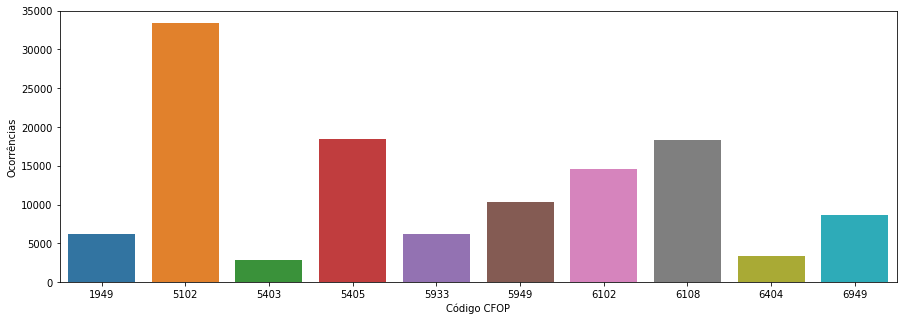

10 CFOPs mais frequentes
 5403     2929
6404     3341
5933     6206
1949     6262
6949     8648
5949    10358
6102    14621
6108    18393
5405    18507
5102    33348
Name: CFOP, dtype: int64


In [13]:
aux = df2["CFOP"].value_counts().sort_values()[-10:]
plt.figure(figsize=((15,5)))
ax = sns.barplot(x=aux.index, y=aux, )
ax.set(xlabel='Código CFOP', ylabel='Ocorrências')
plt.show()
print("10 CFOPs mais frequentes\n",aux)

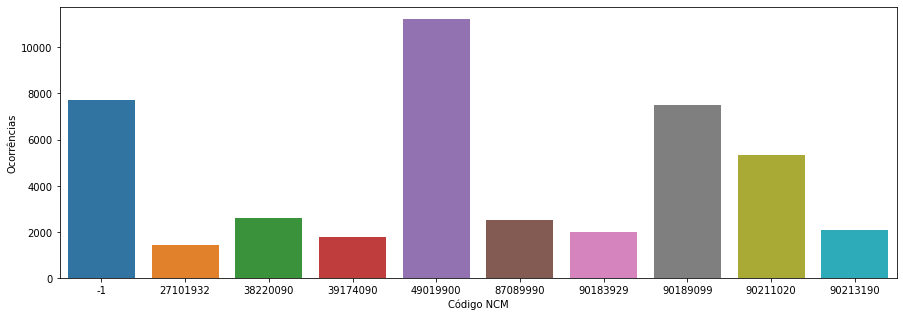

10 NCMs mais frequentes
  27101932     1434
 39174090     1803
 90183929     1994
 90213190     2110
 87089990     2515
 38220090     2593
 90211020     5354
 90189099     7506
-1            7722
 49019900    11197
Name: NCM, dtype: int64


In [14]:
aux = df2["NCM"].value_counts().sort_values()[-10:]
plt.figure(figsize=((15,5)))
ax = sns.barplot(x=aux.index, y=aux, )
ax.set(xlabel='Código NCM', ylabel='Ocorrências')
plt.show()
print("10 NCMs mais frequentes\n",aux)

In [15]:
#Por aqui, podemos ver que NCM=-1 normalmente está associado a serviços. Vamos excluí-los a seguir.
df2[df2["NCM"]==-1]

,DATA,DESCR,NCM,CFOP
33,01/01/2022 02:25:00,SERVICOS RELACIONADOS AO MONITORAMENTO E RASTR...,-1,5933
35,01/01/2022 03:28:00,MANUTENCAO DE HW,-1,5933
36,01/01/2022 03:56:02,SERVICO DE DATACENTER - CONTRATO N° 39/2018 -...,-1,5933
69,01/01/2022 11:01:00,"INSTALACAO, CONFIGURACAO E MANUTENCAO DE PROGR...",-1,5933
76,01/01/2022 12:15:00,N Servico: 202100455410,-1,5933
...,...,...,...,...
323393,31/01/2022 20:10:00,NF ref.aos Serviços Prestados do Contrato:51/2...,-1,5933
323394,31/01/2022 20:10:00,NF ref. aos Serv. Prest. do Contrato:51/2018-O...,-1,5933
323395,31/01/2022 20:10:00,NF ref. aos Serv. Prest. do Contrato:51/2018-O...,-1,5933
323696,31/01/2022 21:34:13,FITA ZEBRADA PRETO/AMARELO 200 M,-1,5102


In [16]:
#Filtrando NCMs = -1
df2 = df2[df2["NCM"]!=-1]
len(df2)

155060

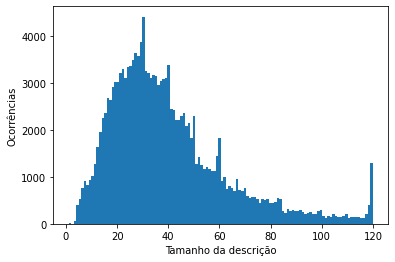

In [17]:
text_lengths = np.array([len(_) for _ in df2['DESCR']])
plt.hist(text_lengths, bins=120)
plt.ylabel("Ocorrências")
plt.xlabel("Tamanho da descrição")
plt.show()

# 5 - Vamos olhar mais atentamente a coluna de descrição

In [18]:
#TIrando PÁ e CD o restante não parecem ser descrições válidas. Vamos excluí-las
np.unique(list(df2[text_lengths<3]["DESCR"]))

array(['*', '-', '.', '5', 'CD', 'LH', 'PÁ', 'UN'], dtype='<U2')

In [19]:
#Filtrando essas descrições curtas
df2 = df2[text_lengths>=3]
len(df2)

155038

# 6 - Vejamos agora quantas descrições iguais possuem campos de NCM e/ou CFOP diferentes.

In [20]:
#Pode se observar que existem descrições idênciticas com NCM e/ou CFOP diferentes. O caso mais emblemático é Filtro de Óleo
df2["DESCR"].value_counts()

FILTRO DE OLEO                            64
FILTRO DE COMBUSTIVEL                     61
FILTRO DE AR                              58
FILTRO COMBUSTIVEL                        52
BANANA PRATA                              46
                                          ..
LACTULOSE XPE 667MG/ML AMEIXA FR 120ML     1
DISSIPADOR DE CALOR PARA FONTE ATX         1
HD 8 TB                                    1
SSD DE 240GB                               1
Leite Cru Refrigerado                      1
Name: DESCR, Length: 129351, dtype: int64

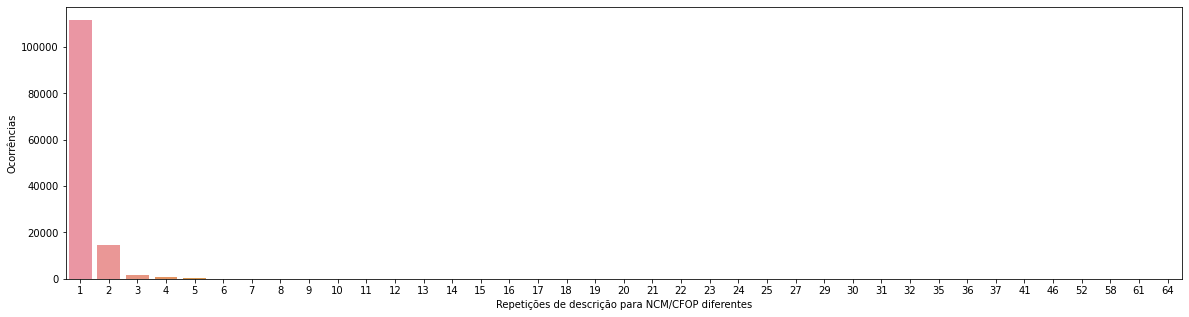

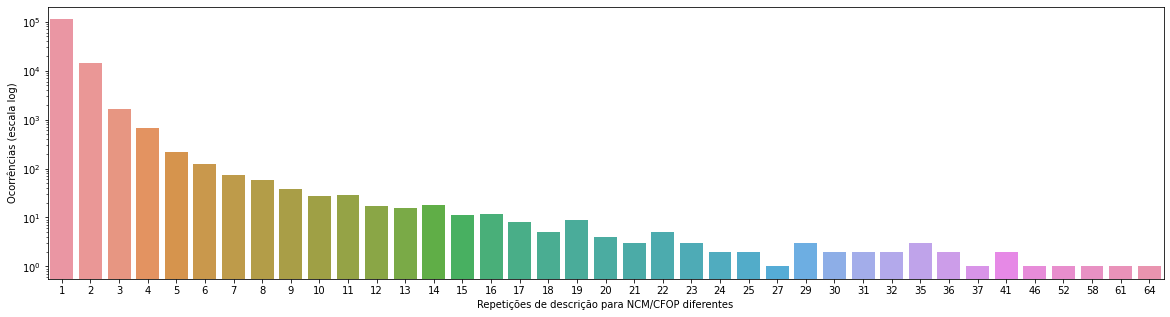

In [21]:
plt.figure(figsize=(20,5))
aux = df2["DESCR"].value_counts().value_counts()
ax = sns.barplot(x=aux.sort_index().index, y=aux.sort_index())
ax.set_yscale("linear")
ax.set(xlabel='Repetições de descrição para NCM/CFOP diferentes', ylabel='Ocorrências')
plt.show()

plt.figure(figsize=(20,5))
aux = df2["DESCR"].value_counts().value_counts()
ax = sns.barplot(x=aux.sort_index().index, y=aux.sort_index())
ax.set_yscale("log")
ax.set(xlabel='Repetições de descrição para NCM/CFOP diferentes', ylabel='Ocorrências (escala log)')
plt.show()

# 7 - Pra um desses itens com muitas repetições, vamos explorar o que acontece com a distribuição de NCM/CFOP

In [22]:
df2["DESCR"].value_counts()[:11]

FILTRO DE OLEO           64
FILTRO DE COMBUSTIVEL    61
FILTRO DE AR             58
FILTRO COMBUSTIVEL       52
BANANA PRATA             46
BATATA DOCE              41
OLEO MOTOR               41
BETERRABA                37
ADITIVO RADIADOR         36
CENOURA                  36
MELANCIA                 35
Name: DESCR, dtype: int64

In [23]:
#Vejamos o quinto item da lista (começa em 0)
selection = df2["DESCR"].value_counts().index[4]
selection

'BANANA PRATA'

In [24]:
#Algumas ocorrências - Tanto o NCM como o CFOP variaram
df2[df2["DESCR"] == selection][:5]


,DATA,DESCR,NCM,CFOP
540,02/01/2022 17:23:00,BANANA PRATA,8039000,6102
595,02/01/2022 23:39:00,BANANA PRATA,8031000,5102
1725,03/01/2022 07:52:41,BANANA PRATA,8039000,5102
2412,03/01/2022 08:12:00,BANANA PRATA,8043000,5102
3556,03/01/2022 09:36:42,BANANA PRATA,6022000,5102


In [25]:
reps = df2[df2["DESCR"] == selection]["NCM"]
list(reps.value_counts())

[10, 8, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

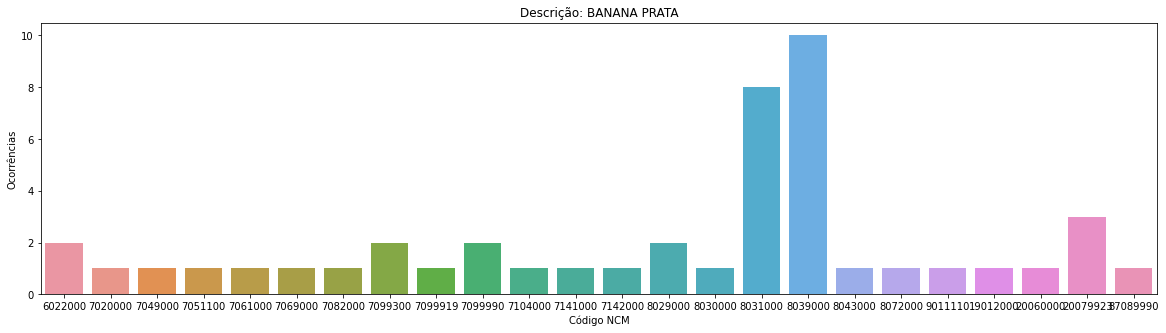

In [26]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=reps.value_counts().index, y=list(reps.value_counts()), )
ax.set(xlabel='Código NCM', ylabel='Ocorrências', title=f"Descrição: {selection}")
plt.show()

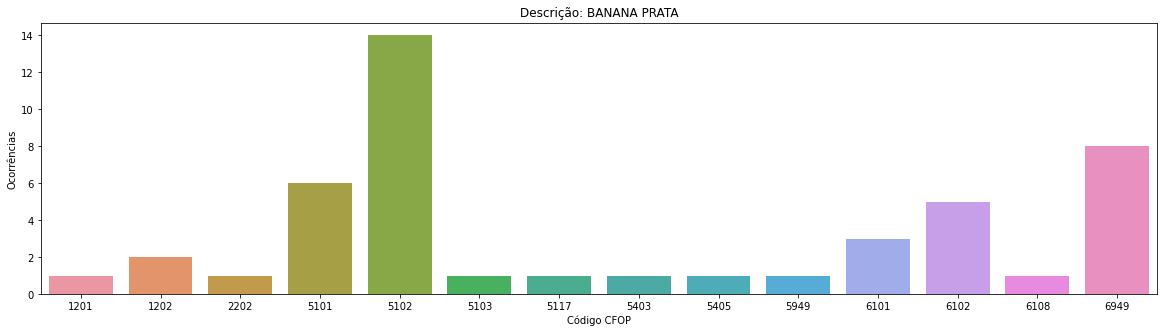

In [30]:
reps = df2[df2["DESCR"] == selection]["CFOP"]
plt.figure(figsize=(20,5))
ax = sns.barplot(x=reps.value_counts().index, y=list(reps.value_counts()), )
ax.set(xlabel='Código CFOP', ylabel='Ocorrências', title=f"Descrição: {selection}")
plt.show()

#8 - Vamos dar uma olhada na distribuição de palavras nas descrições

In [36]:
#Dessa vez não vamos filtrar as repetições das descrições pois a frequência pode ser relevante para uma visualização inicial e/ou também dependendo do modelo que será utilizado
df3 = df[['DATA EMISSÃO','DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH', 'CFOP']]
df3.columns = ["DATA", "DESCR", "NCM", "CFOP"]

#Essa é a filtragem que não será feita aqui
#df3 = df3.drop_duplicates(subset=["DESCR", "NCM", "CFOP"])

df3 = df3[df3["NCM"]!=-1] #Filtrando NCMs = -1

text_lengths = np.array([len(_) for _ in df3['DESCR']])
df3 = df3[text_lengths>=3]

In [37]:
all_words = []
for d in list(df3["DESCR"]):
    all_words += d.split()
words_counts = pd.DataFrame(all_words).value_counts()

In [ ]:
print("Em ")